# Figure 2

In [1]:
%load_ext autoreload
%autoreload 2

# Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src import constants as C
import src.visualisation as vis
from src.visualisation import maps_plots
from src.visualisation import oe_plots
from src.visualisation import z_loeuf_plots
from src.visualisation import z_dist_plots


In [2]:
# Styles and colours
plt.style.use(C.STYLE_DEFAULT)
default_palette = vis.color_palette()
regions_palette = vis.color_palette("regions")
maps_palette = vis.color_palette("maps")

In [3]:
# Get upset plot image file
upset = plt.imread("data/plots/fig_2_upset_plot.png")

In [4]:
# Read data
maps = pd.read_csv(C.STATS_MAPS, sep="\t")

synonymous_oe = pd.read_csv(C.STATS_OE, sep="\t").query("csq == 'synonymous_variant'")
nonsense_oe = pd.read_csv(C.STATS_OE, sep="\t").query("csq == 'stop_gained'")

z_loeuf = pd.read_csv(C.STATS_Z_LOEUF, sep="\t")

z_transcript = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'transcript'")
z_nmd_target = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'nmd_target'")
z_start_proximal = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'start_proximal'")
z_long_exon = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'long_exon'")
z_distal = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'distal'")

## Figure construction

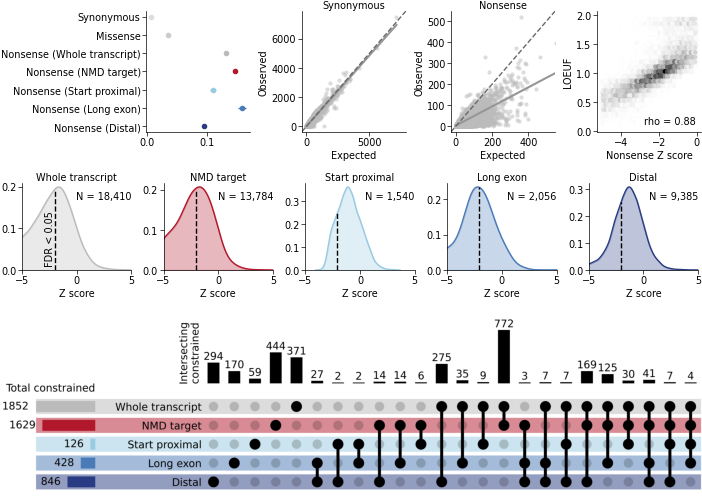

In [5]:
# Instantiate the figure
fig = plt.figure(figsize=(18 * C.CM, 13 * C.CM), layout=("constrained"))

# A subfigure is needed for the upset plot image
subfigs = fig.subfigures(3, 1, height_ratios=[5, 4, 6])

# Define the Axes
axs_top = subfigs[0].subplots(1, 4)
axs_middle = subfigs[1].subplots(1, 5)
ax_bottom = subfigs[2].subplots(1, 1)

ax_maps = axs_top[0]
ax_oe_syn = axs_top[1]
ax_oe_non = axs_top[2]
ax_z_loeuf = axs_top[3]

ax_z_transcript = axs_middle[0]
ax_z_nmd = axs_middle[1]
ax_z_long = axs_middle[2]
ax_z_distal = axs_middle[3]
ax_z_start = axs_middle[4]

# Plots

## Upset plot image
ax_bottom.imshow(upset)
ax_bottom.axis("off")

## MAPS plot
for i, row in maps.iterrows():
    maps_plots.plot_maps(
        ax=ax_maps, y=row["csq"], x=row["maps"], xerr=row["ci95"], color=maps_palette[i]
    )

## Synonymous and nonsense OE plots
for df, ax, title in zip(
    [synonymous_oe, nonsense_oe], [ax_oe_syn, ax_oe_non], ["Synonymous", "Nonsense"]
):
    oe_plots.oe(
        df,
        ax=ax,
        color=regions_palette.transcript,
        scatter_kws=dict(alpha=0.5),
        line_kws=dict(color=vis.adjust_lightness(regions_palette.transcript, 0.8)),
    )
    oe_plots.add_x_eq_y_line(ax=ax, color="dimgrey")
    oe_plots.axis_labels(ax=ax, title=title)

## Z vs LOEUF plot
z_loeuf_plots.hexbin(z_loeuf, ax=ax_z_loeuf, cmap="Greys", zmin=-5, zmax=0)
z_loeuf_plots.axis_labels(ax=ax_z_loeuf)
z_loeuf_plots.add_rho(0.88, ax=ax_z_loeuf)

## Z score distributions
for df, ax, colour, title, fdr_label in zip(
    [z_transcript, z_nmd_target, z_start_proximal, z_long_exon, z_distal],
    axs_middle,
    regions_palette,
    C.REGION_LABELS,
    ["FDR < 0.05"] + [""] * 4,
):
    z_dist_plots.z_dist(df, ax, color=colour,)
    z_dist_plots.fill_kde(ax, color=colour, alpha=0.3)
    z_dist_plots.fdr_line(df, ax, label=fdr_label)
    z_dist_plots.add_count(df, ax)
    z_dist_plots.axis_labels(title, ax=ax)

# Save figure
plt.savefig("data/plots/figures/fig_02.svg")
plt.savefig("data/plots/figures/fig_02.png", dpi=1000)
